In [4]:
from abs_deal_generator import generate_abs_deal, export_to_excel
abs_deal = generate_abs_deal()
export_to_excel(abs_deal)

✅ Excel file created: /workspaces/ABS-Simulator/abs_project/src/data/deals/AUTOFR_2021-3.xlsx


In [5]:
#Optionnel, on le met en yaml
import yaml

with open("Test_1.yaml", "w") as f:
    yaml.dump(abs_deal, f, sort_keys=False)


In [8]:
from simulator import Assumptions

ass = Assumptions(
    CPR_annual=0.060,
    CDR_annual=0.08,
    recovery_rate=0.45,
    recovery_lag_months=3,
    servicing_fee_annual=0.0075,
    senior_fees_annual=0.0025,
    scenario_name="Base Case"
)

{'A': {'DM_bps': 43.31392785962751,
       'WAL_years': 2.10424618761693,
       'int_total': 6238053.910893185,
       'notional_end': 0.0,
       'notional_start': 86177547.83,
       'prin_total': 86177547.83},
 'B': {'DM_bps': 204.17564058398582,
       'WAL_years': 4.442903643229956,
       'int_total': 1696567.9942032294,
       'notional_end': 0.0,
       'notional_start': 9006136.37,
       'prin_total': 9006136.37},
 'C': {'DM_bps': 372.331970101565,
       'WAL_years': 4.8068989349670455,
       'int_total': 1498631.8242426517,
       'notional_end': 0.0,
       'notional_start': 5557341.67,
       'prin_total': 5557341.67},
 'Equity': {'DM_bps': nan,
            'WAL_years': 0.0,
            'int_total': 0.0,
            'notional_end': 11258974.13,
            'notional_start': 11258974.13,
            'prin_total': 0.0},
 'Equity_residual': {'total_residual_cash': 21073387.067327645}}


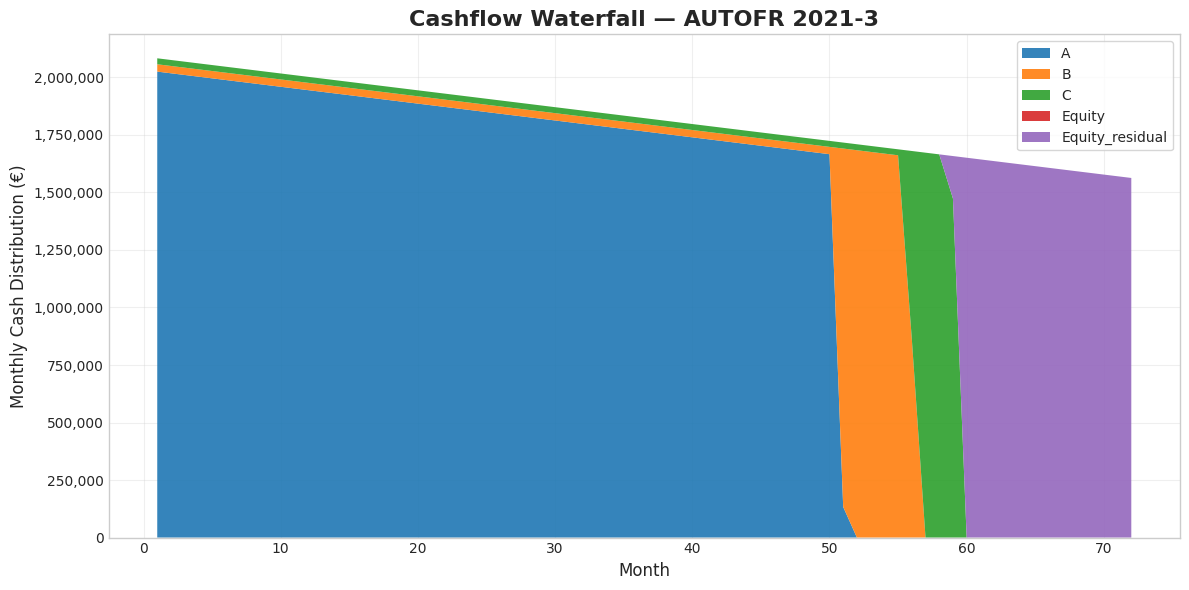

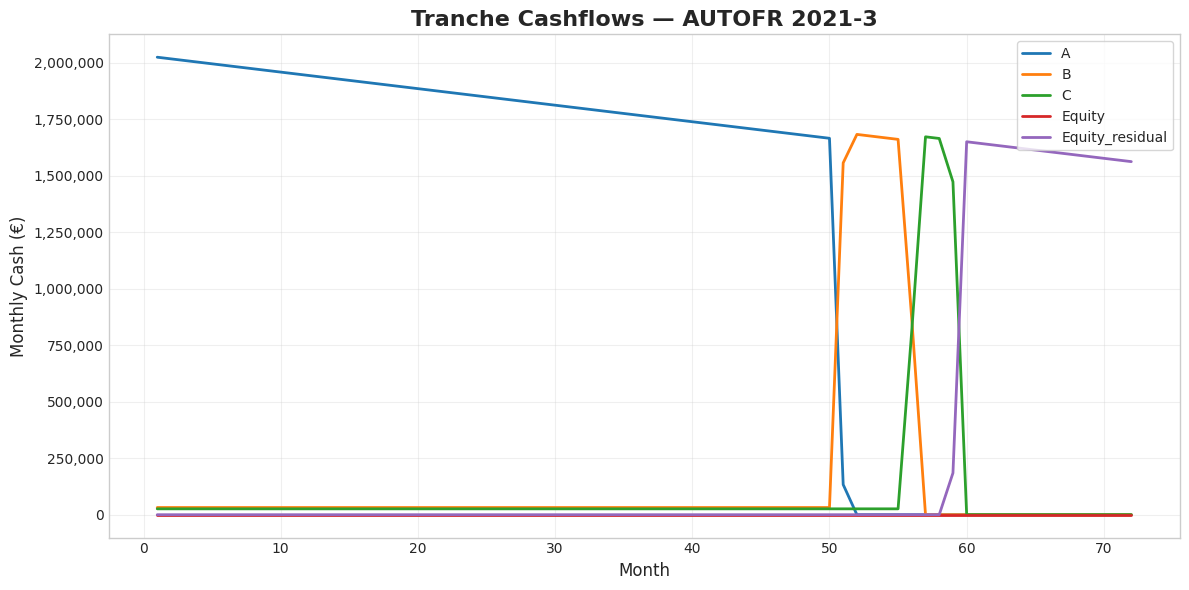

In [9]:
from simulator import load_from_dict, WaterfallEngine, plot_waterfall, plot_waterfall_lines

# 2️⃣ Load the YAML file you just created
with open("Test_1.yaml", "r") as f:
    abs_data = yaml.safe_load(f)

# 3️⃣ Parse YAML -> Deal, Pool, Tranches, Assumptions
deal, pool, tranches, ass = load_from_dict(abs_data)

# 4️⃣ Create simulation engine
# You can update base_index_annual to your EURIBOR assumption (e.g. 0.026 = 2.6%)
engine = WaterfallEngine(deal, pool, tranches, ass, base_index_annual=0.026)

# 5️⃣ Run the waterfall simulation
engine.simulate()

# 6️⃣ Print summary metrics (WAL, DM, etc.)
from pprint import pprint
pprint(engine.results_summary())

# 7️⃣ Plot waterfall (stacked & individual)
plot_waterfall(engine)
plot_waterfall_lines(engine)